In [1]:
import sys
sys.path.append("../../survival_benefit/src")
from predict_comb_therapy_effect import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.ticker as plticker
from datetime import date
from pathlib import Path

In [15]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [16]:
outdir = '../analysis/figure/{}/'.format(date.today())
new_directory = Path(outdir)
new_directory.mkdir(parents=True, exist_ok=True)

In [17]:
cox_df = pd.read_csv('../analysis/PFS_predictions/2022-06-06/cox_ph_test.csv', index_col=False)
cox_df = cox_df[::-1] # reverse order

In [18]:
cox_df = cox_df.sort_values('HR_add', ascending=False)

In [19]:
cox_df

,Path,Experimental,Control,Combination,label,Experimental First Scan Time,Control First Scan Time,Figure,Model,Corr,...,N_combo,p_ind,HR_ind,HRlower_ind,HRupper_ind,p_add,HR_add,HRlower_add,HRupper_add,model
28,../data/trials/PemetrexedDisodium,Mesothelioma_PemetrexedDisodium_Taylor2008_PFS,Mesothelioma_Cisplatin_Vogelzang2003_TTP,Mesothelioma_PemetrexedDisodium-Cisplatin_Voge...,Mesothelioma Pemetrexed + Cisplatin,9999.00,1.50,independent,worse,0.15,...,NaN,5.645163e-05,1.432883,1.202777,1.707009,4.340432e-11,1.828563,1.528192,2.187974,independent
2,../data/trials/Capecitabine,Breast_Capecitabine_Kaufman2015_PFS,Breast_Docetaxel_OShaughnessy2002_PFS,Breast_Capecitabine-Docetaxel_OShaughnessy2002...,Breast Cancer Capecitabine + Docetaxel,1.00,1.50,independent,independent,0.62,...,NaN,1.313357e-01,1.140598,0.961433,1.353151,9.028923e-06,1.480405,1.244960,1.760376,independent
23,../data/trials/Gemcitabine,Lung_Gemcitabine_Lara2004_PFS,Lung_Cisplatin_Sandler2000_PFS,Lung_Gemcitabine-Cisplatin_Sandler2000_PFS,NSCLC Gemcitabine + Cisplatin,1.50,1.50,independent,independent,0.46,...,NaN,1.624684e-01,1.128569,0.952407,1.337314,1.766891e-05,1.457371,1.227109,1.730839,independent
3,../data/trials/Everolimus,Breast_Everolimus_Jerusalem2018_PFS,Breast_Exemestane_Baselga2012_PFS,Breast_Everolimus-Exemestane_Baselga2012_PFS,HR+/HER2- Breast Cancer Everolimus + Exemestane,1.50,1.50,independent,independent,0.30,...,485.0,4.406335e-01,1.070080,0.900842,1.271113,2.117102e-04,1.401764,1.172398,1.676003,independent
16,../data/trials/ZivAflibercept,Colorectal_ZivAflibercept_Tang2012_PFS_merged,Colorectal_FOLFIRI_VanCutsem2012_PFS,Colorectal_ZivAflibercept-FOLFIRI_VanCutsem201...,Colorectal Cancer Ziv-Aflibercept + FOLFIRI,2.00,1.50,independent,independent,0.30,...,NaN,1.221714e-01,1.116148,0.970981,1.283019,6.070704e-05,1.345167,1.163684,1.554953,independent
11,../data/trials/Trastuzumab,Breast_Trastuzumab_Vogel2002_PFS,Breast_Chemotherapy_Slamon2001_PFS,Breast_Trastuzumab-Chemotherapy_Slamon2001_PFS,HER2+ Breast Cancer Trastuzumab + Chemotherapy,2.00,2.00,independent,independent,0.30,...,NaN,2.435430e-01,1.117956,0.926912,1.348375,3.168278e-03,1.332653,1.101239,1.612697,independent
21,../data/trials/Atezolizumab/Lung,Lung_Atezolizumab_Rittmeyer2017_PFS_nonsquamou...,Lung_PaclitaxelProteinBound+Carboplatin_West20...,Lung_Atezolizumab-PaclitaxelProteinBound+Carbo...,Nonsq. NSCLC Atezolizumab + Nab-Placlitaxel + ...,1.50,1.50,independent,independent,0.30,...,NaN,3.294187e-01,1.073206,0.931154,1.236929,1.636044e-04,1.321274,1.143093,1.527230,independent
41,../data/trials/Flutamide,Prostate_Flutamide_Chang1996_TTF,Prostate_Leuprolide_Crawford1989_PFS,Prostate_Flutamide-Leuprolide_Crawford1989_PFS,Prostate Cancer Flutamide + Leuprolide,3.00,3.00,independent,independent,0.30,...,NaN,1.667221e-01,1.156818,0.941011,1.422116,2.240417e-02,1.273642,1.034860,1.567522,independent
20,../data/trials/Atezolizumab/Lung,Lung_Atezolizumab_Rittmeyer2017_PFS_nonsquamou...,Lung_Bevacizumab+Paclitaxel+Carboplatin_Socins...,Lung_Atezolizumab-Bevacizumab+Paclitaxel+Carbo...,Nonsq. NSCLC Atezolizumab + Bevacizumab + Pacl...,1.50,1.50,independent,independent,0.30,...,NaN,4.357974e-01,0.938380,0.799672,1.101149,1.331656e-02,1.230566,1.044133,1.450287,independent
37,../data/trials/Bevacizumab/Ovarian,Ovarian_Bevacizumab_Burger2007_PFS,Ovarian_Paclitaxel+Carboplatin_Burger2011_PFS,Ovarian_Bevacizumab-Paclitaxel+Carboplatin_Bur...,Newly Diagnosed Ovarian Cancer Bevacizumab + P...,2.25,2.25,additive,additive,0.30,...,NaN,1.413178e-01,0.901746,0.785658,1.034985,7.170938e-03,1.217668,1.054833,1.405639,additive


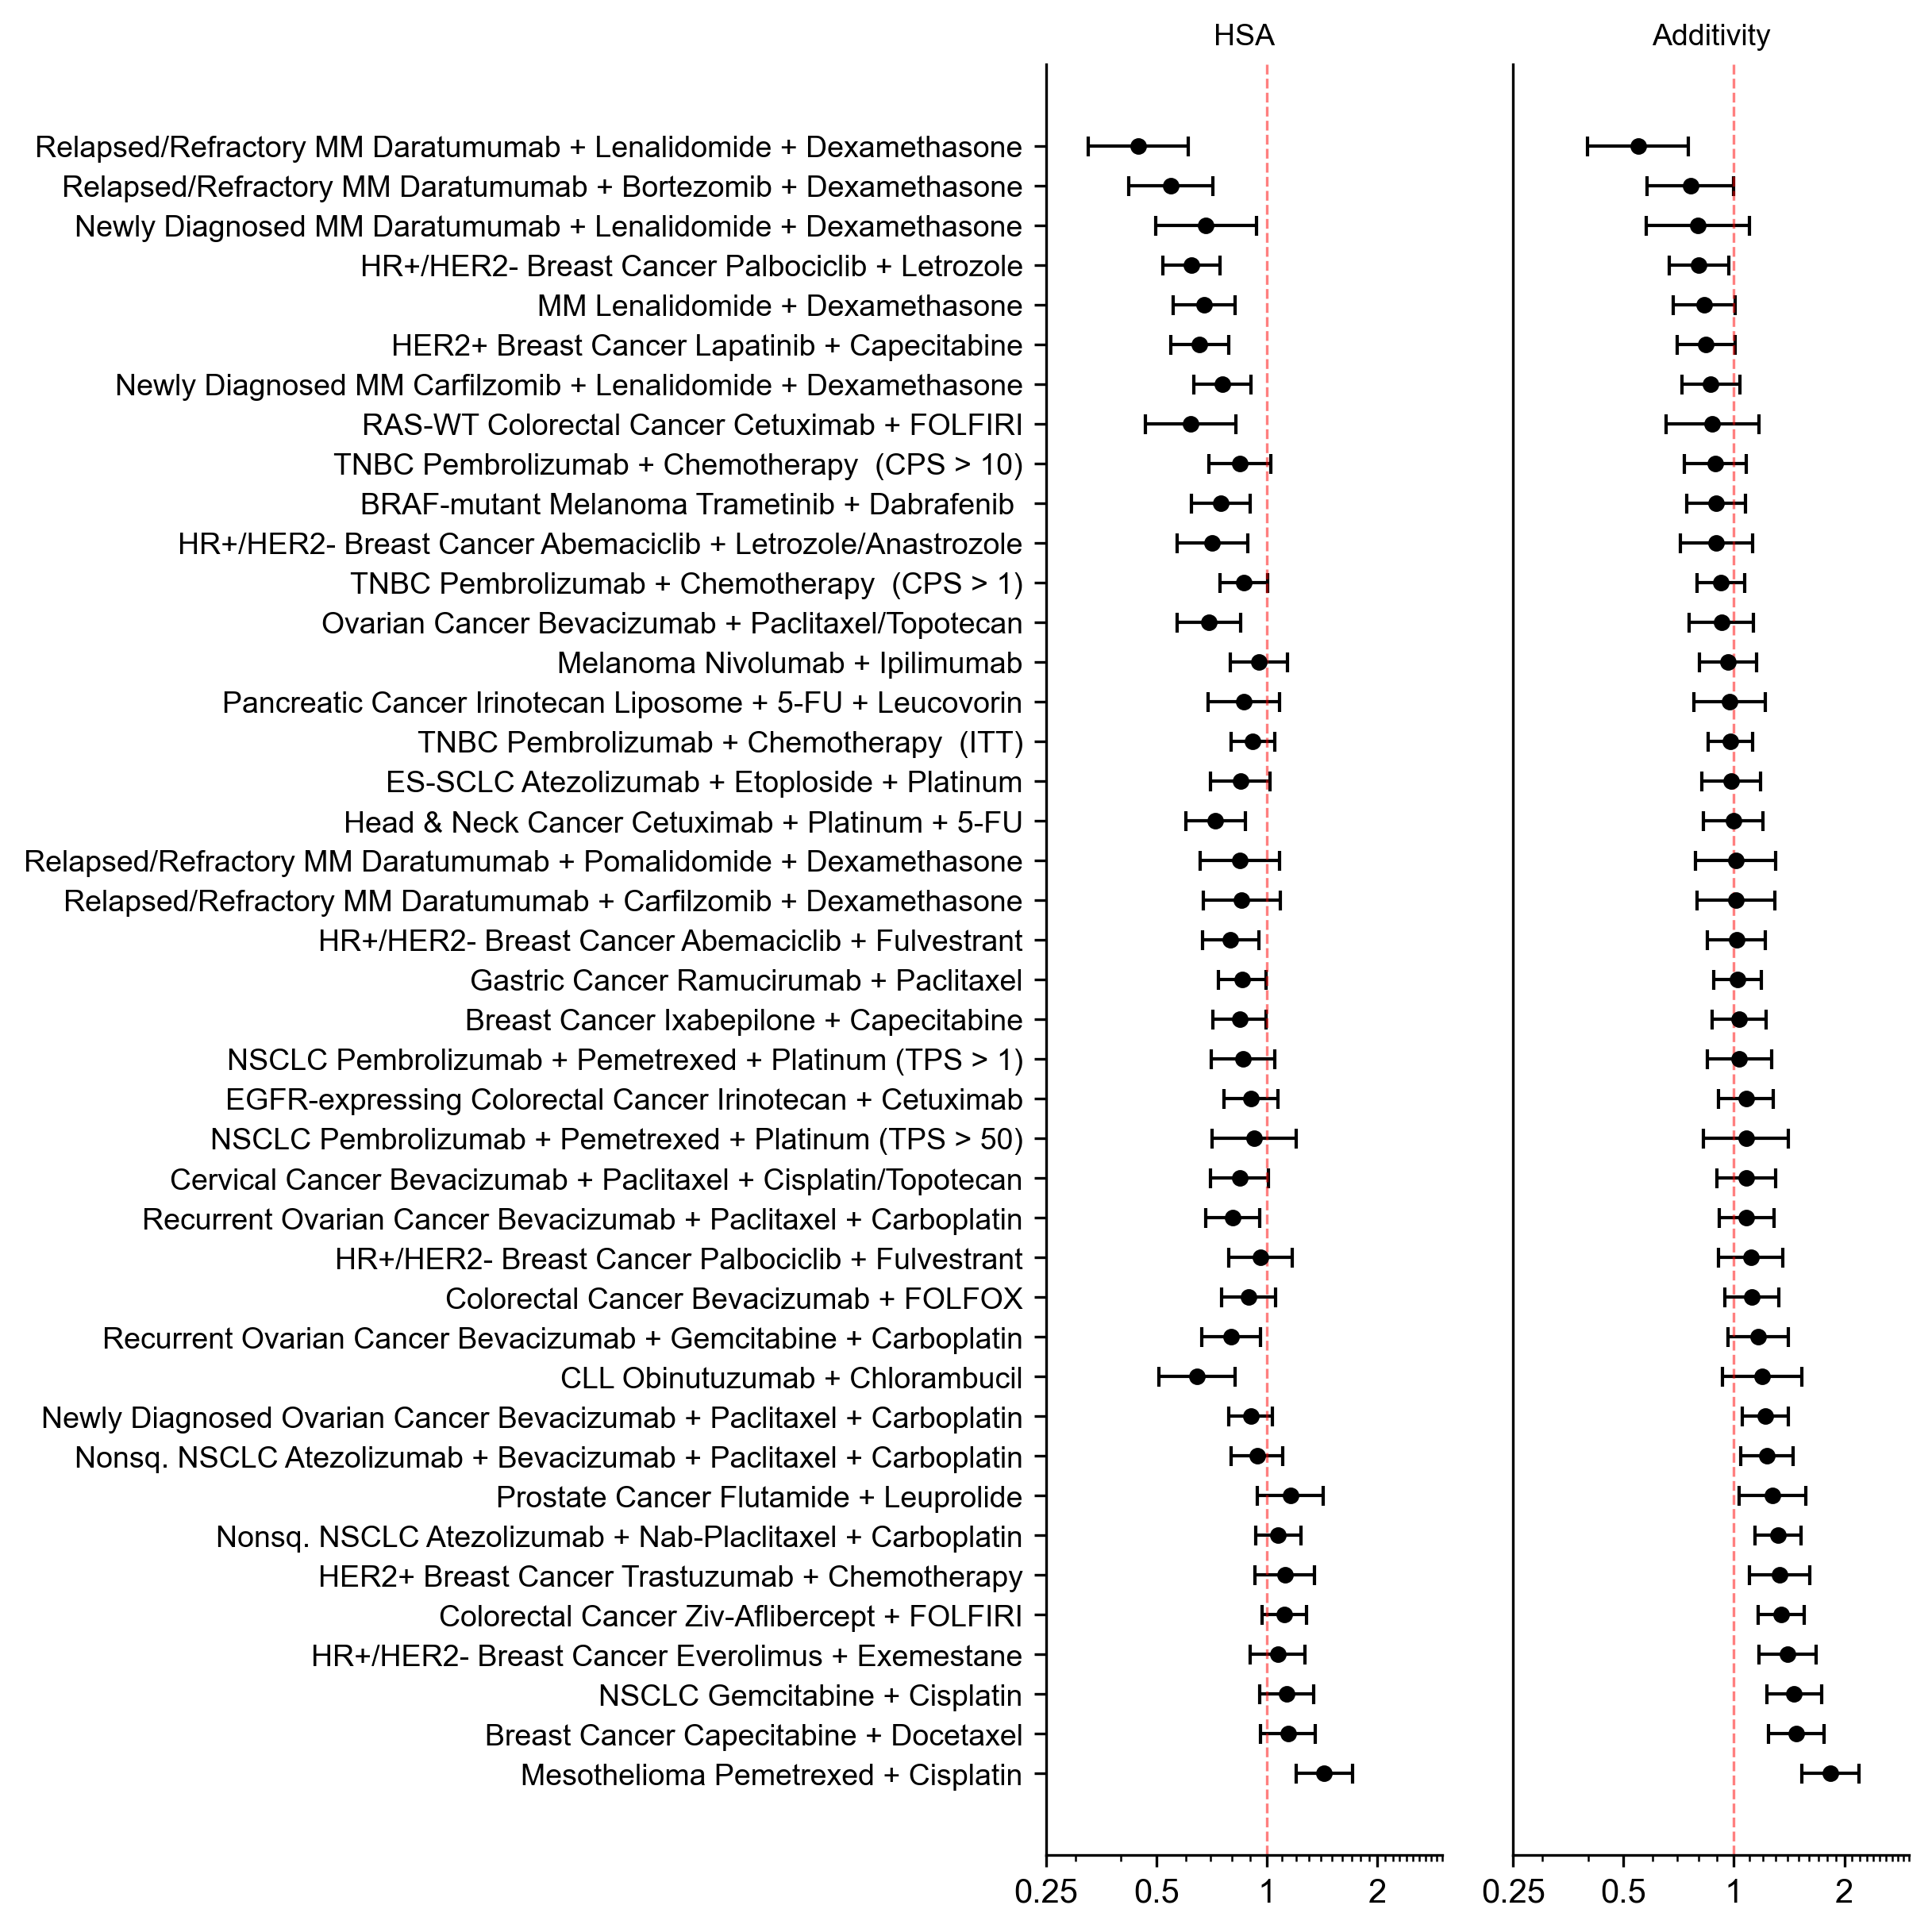

In [20]:
mm = 1/25.4
params = {'legend.fontsize':9,
          'axes.labelsize': 9,
          'axes.titlesize': 9,
          'ytick.labelsize': 9,
          'legend.title_fontsize': 9}

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, axes = plt.subplots(1, 2, figsize=(8, 8), dpi=300, constrained_layout=True)
rcParams.update(params)
sns.despine()

labels = cox_df['label'].values

# independence
hr_vals = cox_df['HR_ind'].values
ci = np.array([cox_df['HR_ind'].values - cox_df['HRlower_ind'].values, cox_df['HRupper_ind'].values - cox_df['HR_ind'].values])
axes[0].errorbar(x=hr_vals,
                 y=labels,
                 xerr=ci,
                 color='black',  capsize=3, linestyle='None', 
                 linewidth=1, marker="o", markersize=4, mfc="black", mec="black")
axes[0].set_title('HSA')

# additivity
hr_vals = cox_df['HR_add'].values
ci = np.array([cox_df['HR_add'].values - cox_df['HRlower_add'].values, cox_df['HRupper_add'].values - cox_df['HR_add'].values])
axes[1].errorbar(x=hr_vals,
                 y=[str(i) for i in range(len(hr_vals))],
                 xerr=ci,
                 color='black',  capsize=3, linestyle='None', 
                 linewidth=1, marker="o", markersize=4, mfc="black", mec="black")
axes[1].set_title('Additivity')
axes[1].axes.yaxis.set_visible(False)
for ax in axes:
    ax.axvline(x=1, linewidth=0.8, linestyle='--', color='red', alpha=0.5)
    ax.set_xscale('log', base=2)
    x_major = [0.25, 0.5, 1, 2]
    ax.xaxis.set_major_locator(plticker.FixedLocator(x_major))
    ax.xaxis.set_major_formatter(plticker.FixedFormatter(x_major))
    ax.xaxis.set_minor_locator(plticker.MultipleLocator(base=0.1))
    ax.xaxis.set_minor_formatter(plticker.NullFormatter())
    ax.set_xlim(0.25, 3)

fig.savefig(outdir + 'hsa_additivity_forest_plot.pdf')
plt.show()